## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
df = pd.read_csv('./data/final/05_species_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,1,67,0,0,31.25,17.0
2,P3,1,0.000233,0.007146,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01888,0.0,0.0,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,1,66,0,0,93.75,21.0
4,P5,1,0.000164,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:1340]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,k__Bacteria;p__Tenericutes;c__Mollicutes;o__NA;f__NA;g__NA;s__sp67941,k__Bacteria;p__Thermotogae;c__Thermotogae;o__Thermotogales;f__Thermotogaceae;g__NA;s__sp68412,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__NA;f__NA;g__NA;s__sp68841,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales;f__Opitutaceae;g__Opitutus;s__sp68878,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69092,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69093,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.000233,0.007146,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01888,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.000164,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000128,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
87,0.000153,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
88,0.000395,0.000000,0.0,0.0,0.0,0.000443,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
89,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:1340]
y = df.iloc[:,1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 1338)
(19, 1338)
(72,)
(19,)


## Train, predict and explain

### XGBoost

In [10]:
clfxgb = XGBClassifier(random_state=42)
clfxgb.fit(X, y)
y_predxgb = clfxgb.predict(X)

In [11]:
print('Accuracy:',accuracy_score(y, y_predxgb))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predxgb))
print('F1 score:',f1_score(y, y_predxgb,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predxgb))
print(confusion_matrix(y, y_predxgb))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


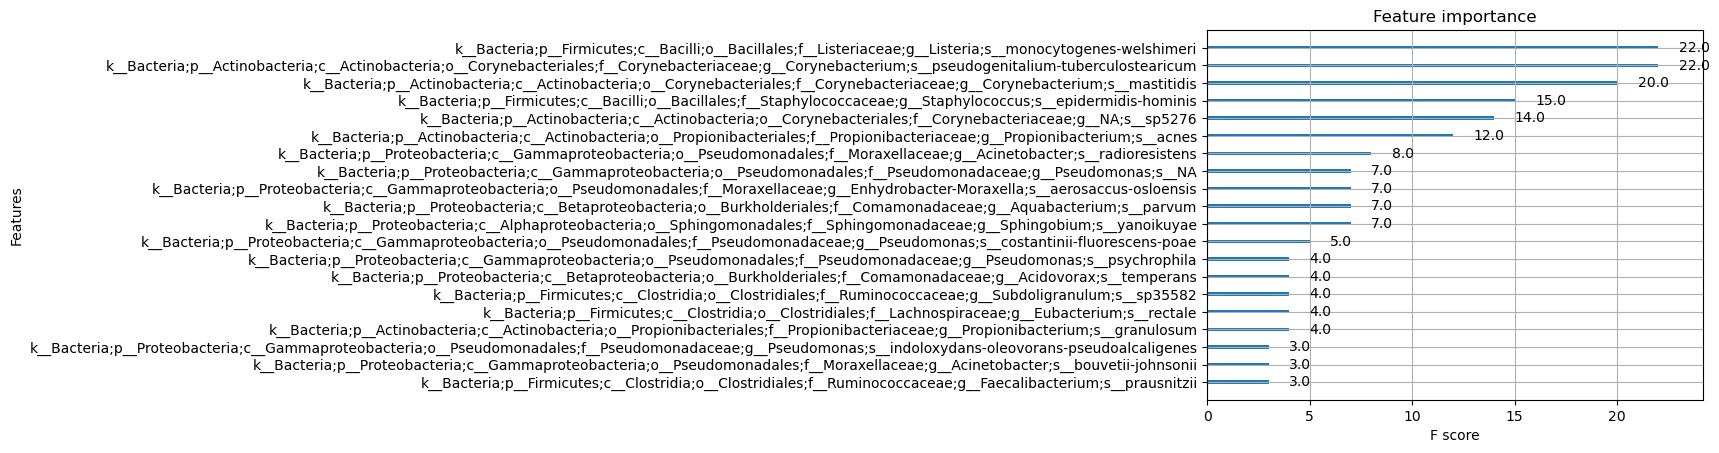

In [12]:
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

In [ ]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X_test)

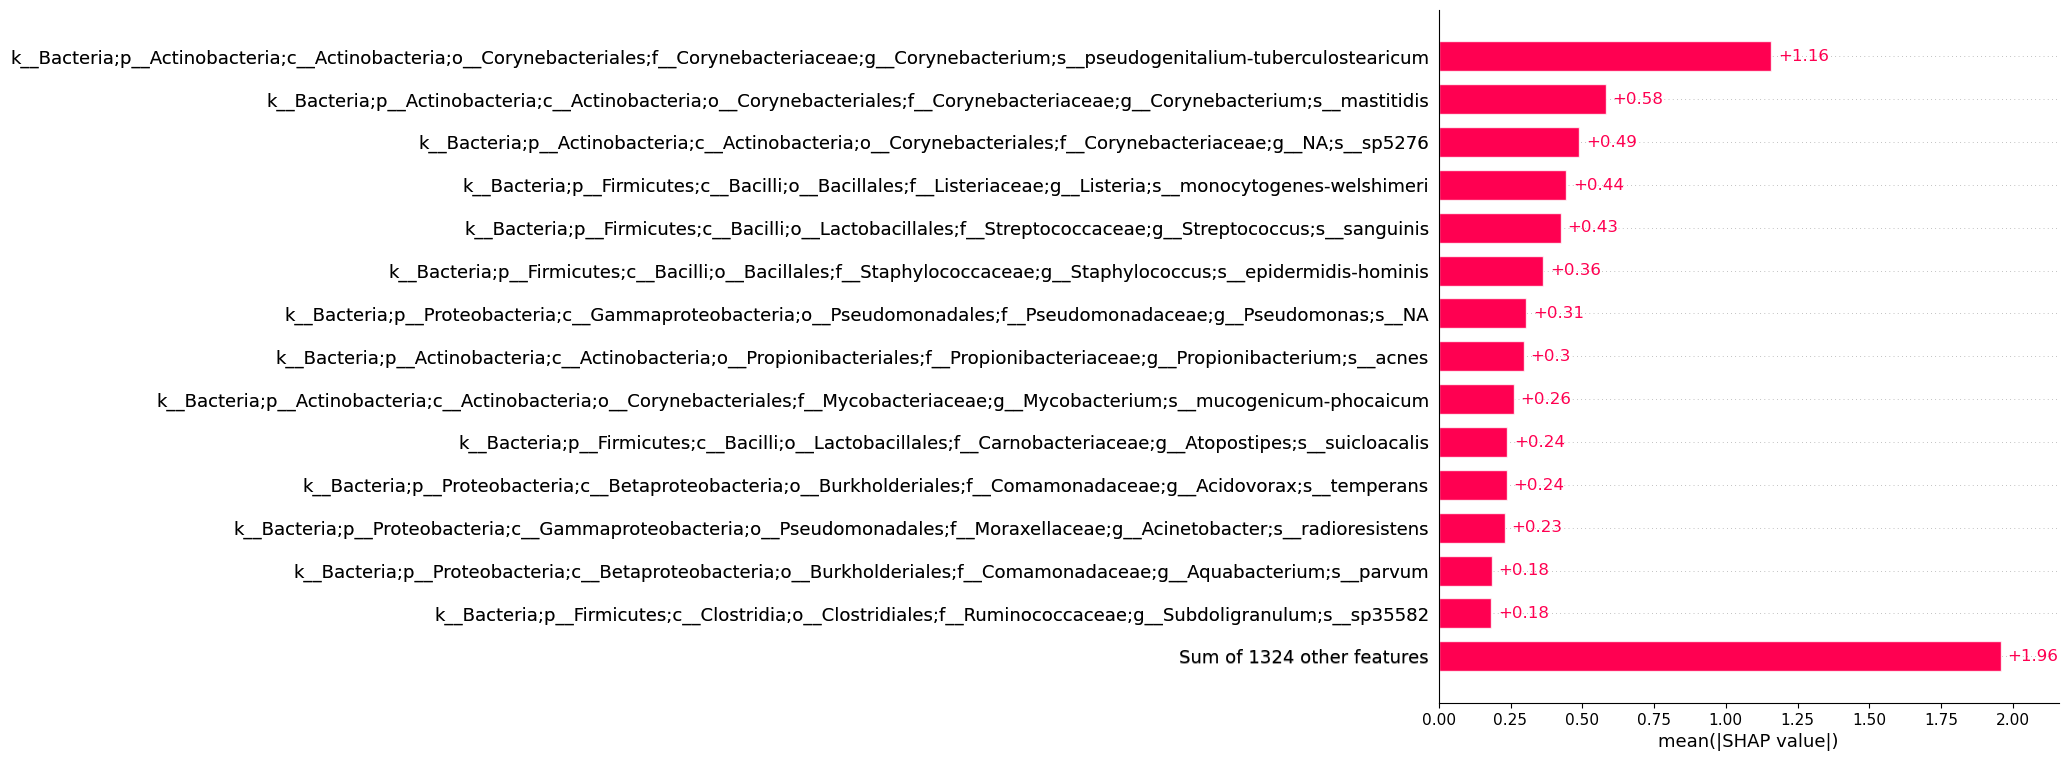

In [14]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb, max_display=15)

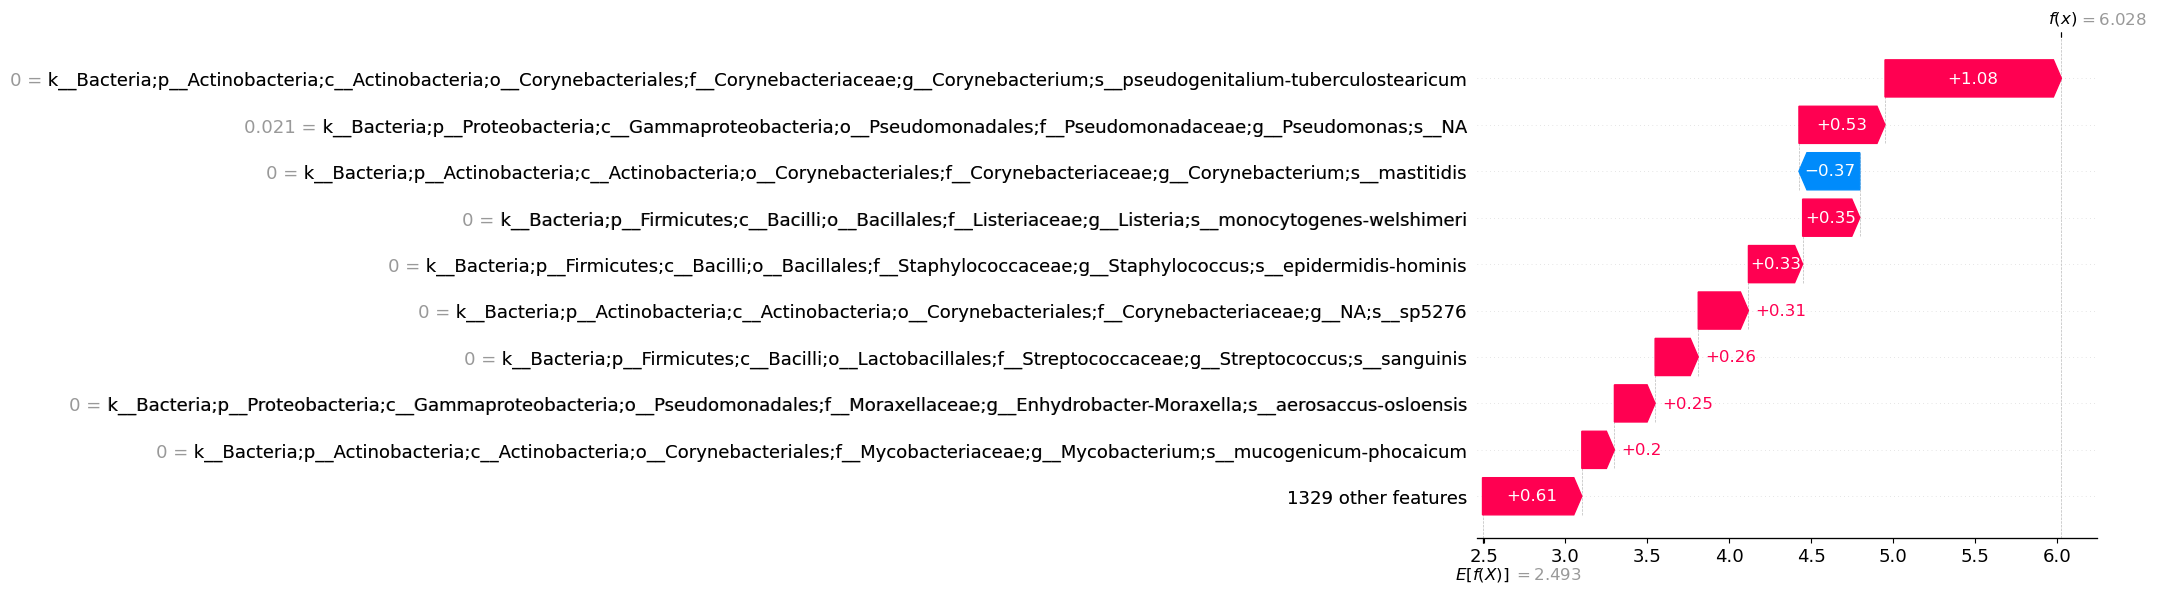

In [15]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


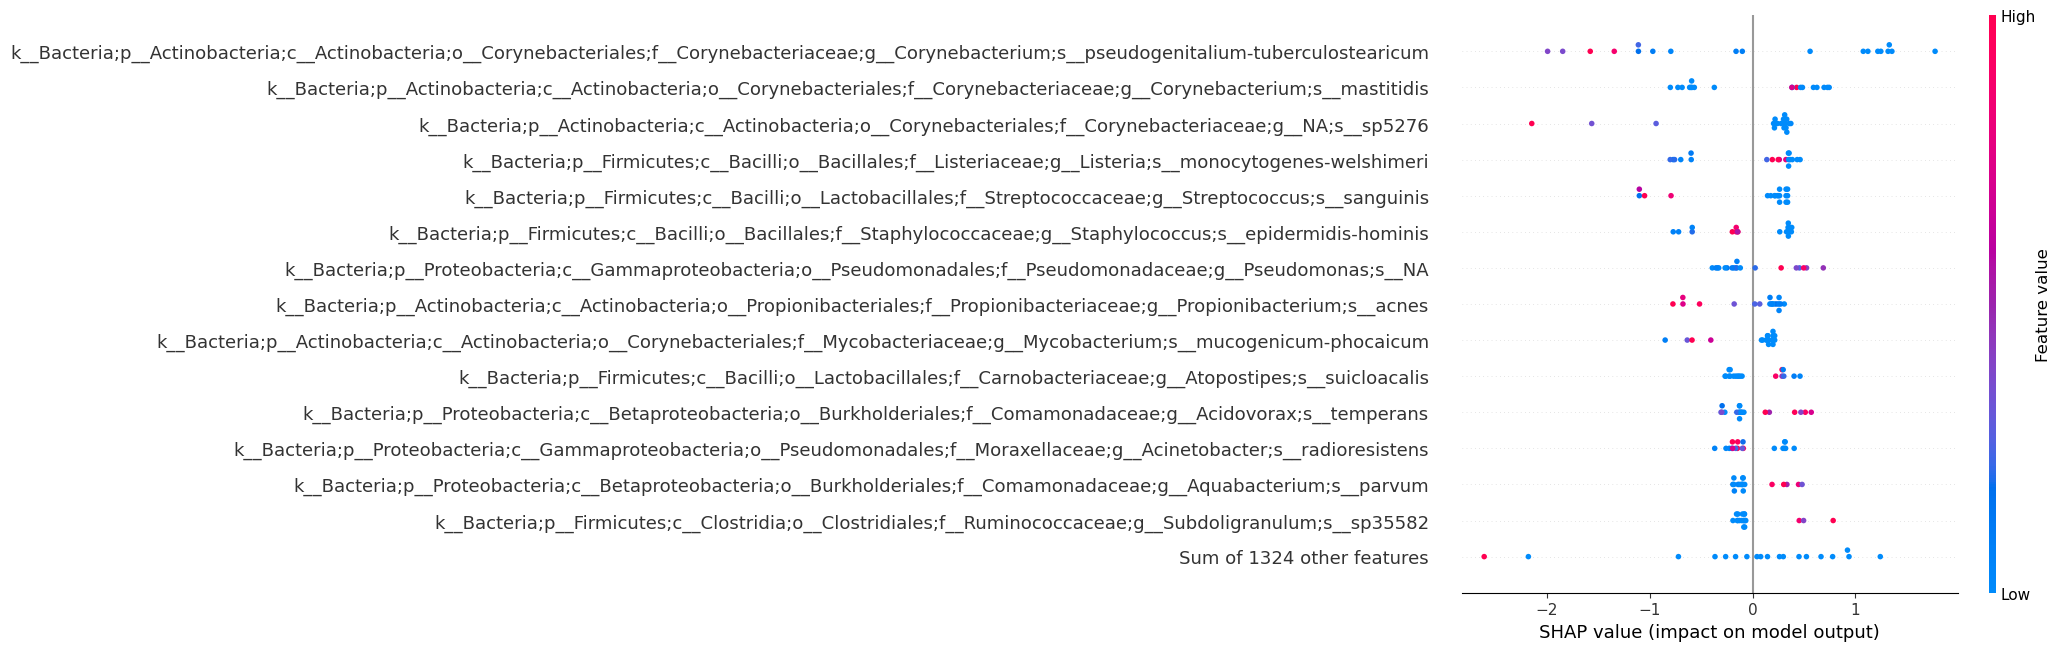

In [16]:
shap.plots.beeswarm(shap_valuesxgb, max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_predlgbm = clflgbm.predict(X)

In [18]:
print('Accuracy:',accuracy_score(y, y_predlgbm))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predlgbm))
print('F1 score:',f1_score(y, y_predlgbm,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predlgbm))
print(confusion_matrix(y, y_predlgbm))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

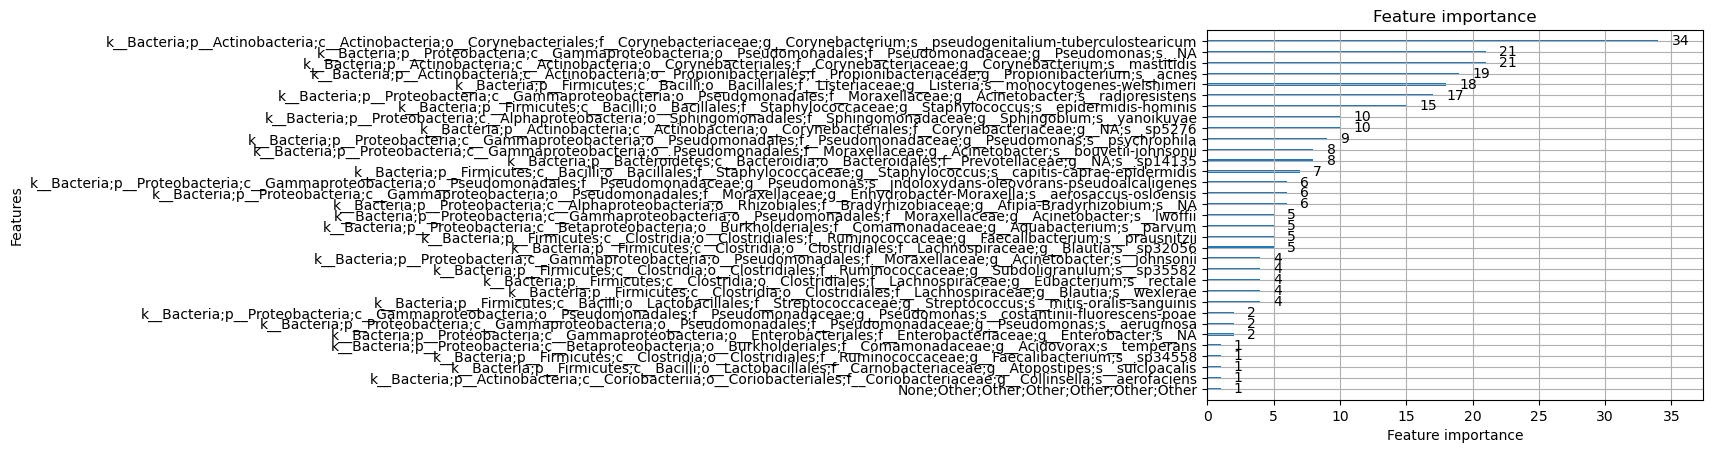

In [19]:
lgb.plot_importance(clflgbm)

In [20]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X_test)

In [21]:
# Compute SHAP values for the dataset

shap_valueslgbm = explainerlgbm(X_test)

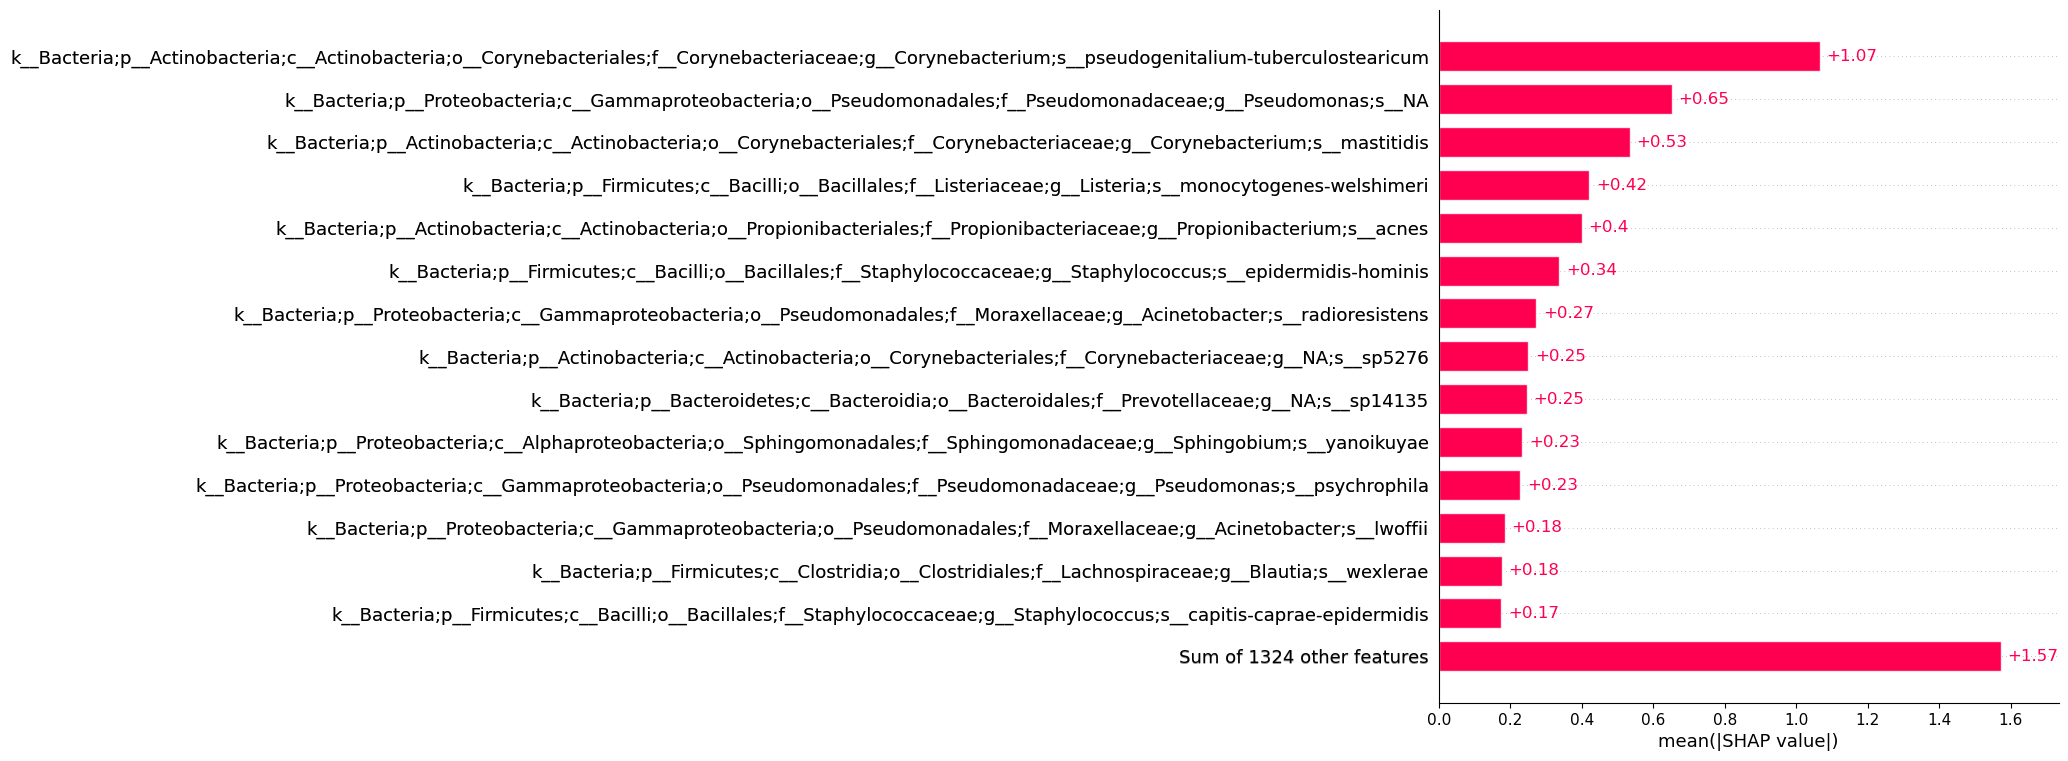

In [22]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valueslgbm, max_display=15)

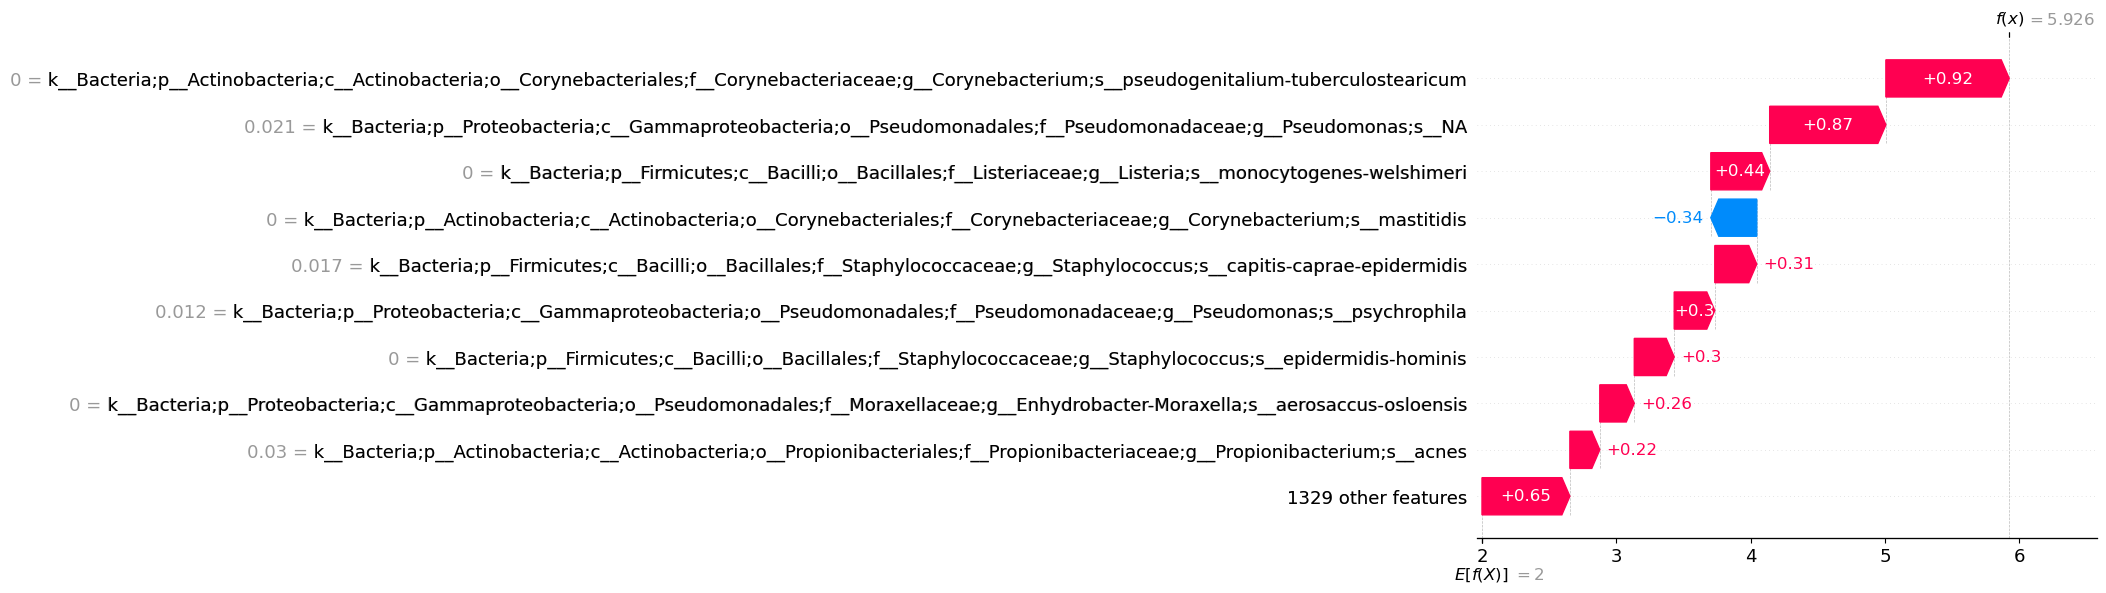

In [23]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valueslgbm[instance_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


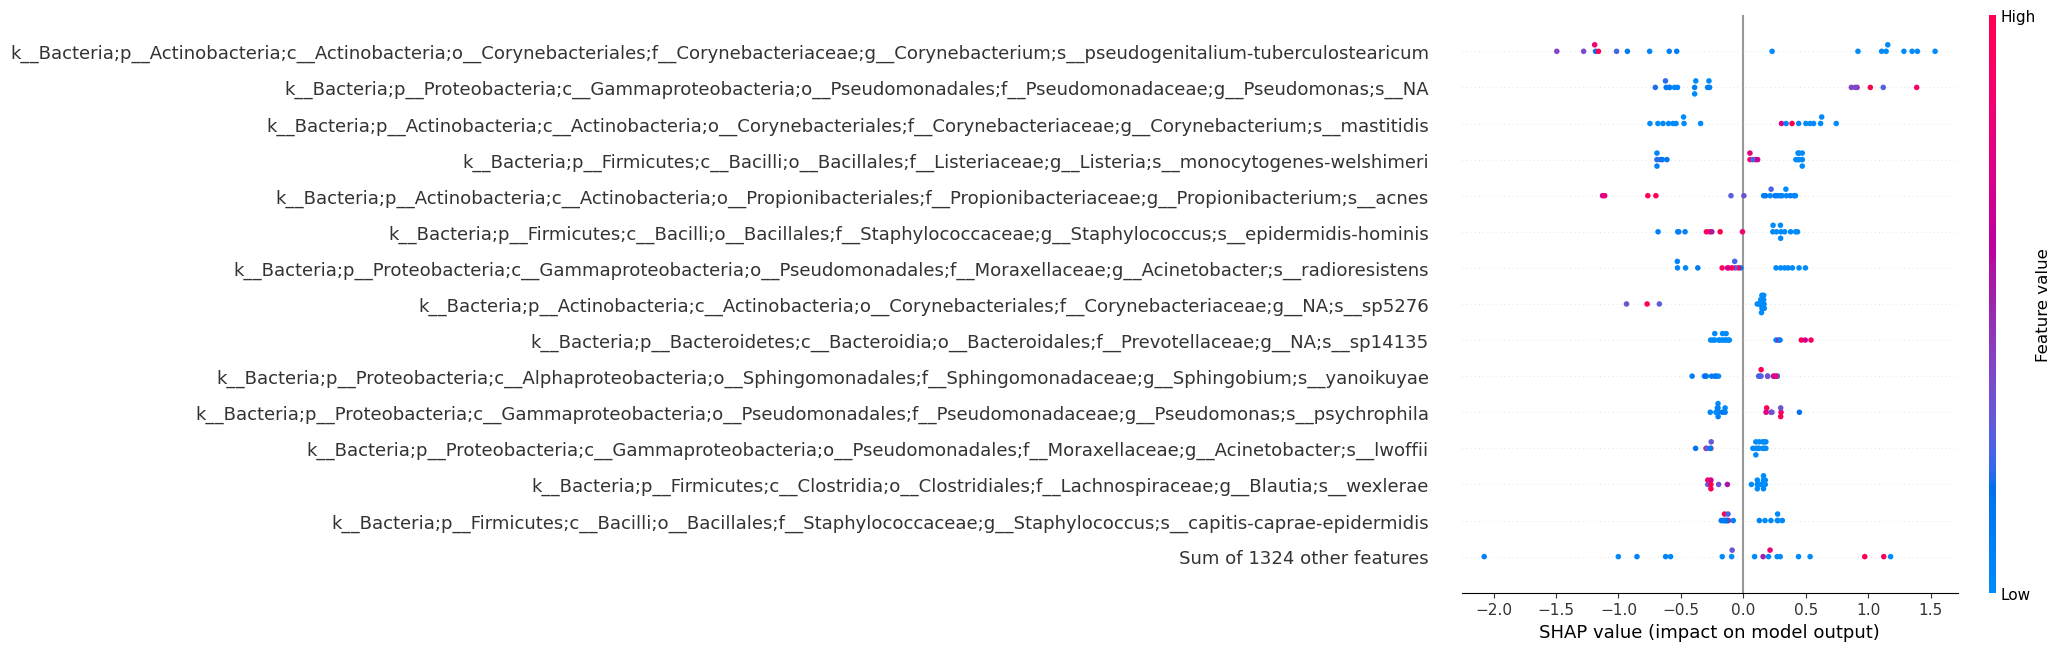

In [24]:
shap.plots.beeswarm(shap_valueslgbm, max_display=15)

### Multilayer perceptron

In [25]:
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False)
clfmlp.out_activation_="softmax"
clfmlp.fit(X_train, y_train)
y_predmlp = clfmlp.predict(X_test)

In [26]:
print('Accuracy:',accuracy_score(y_test, y_predmlp))
print('Balanced accuracy: ',balanced_accuracy_score(y_test, y_predmlp))
print('F1 score:',f1_score(y_test, y_predmlp,average='weighted'))
print('MCC:', matthews_corrcoef(y_test, y_predmlp))
print(confusion_matrix(y_test, y_predmlp))

Accuracy: 0.7894736842105263
Balanced accuracy:  0.7285714285714285
F1 score: 0.7894736842105263
MCC: 0.45714285714285713
[[ 3  2]
 [ 2 12]]


In [27]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clfmlp,X_train, y_train,n_repeats=20, random_state = 42)

In [28]:
MLPfeatures = pd.DataFrame(clfmlp.feature_names_in_,columns=['Features'])
MLPfeatures['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
MLPfeatures = MLPfeatures.sort_values(by = 'Importance_values',ascending=True)[-15:]
#Remove features with importance =0
MLPfeatures=MLPfeatures[MLPfeatures['Importance_values']!=0]

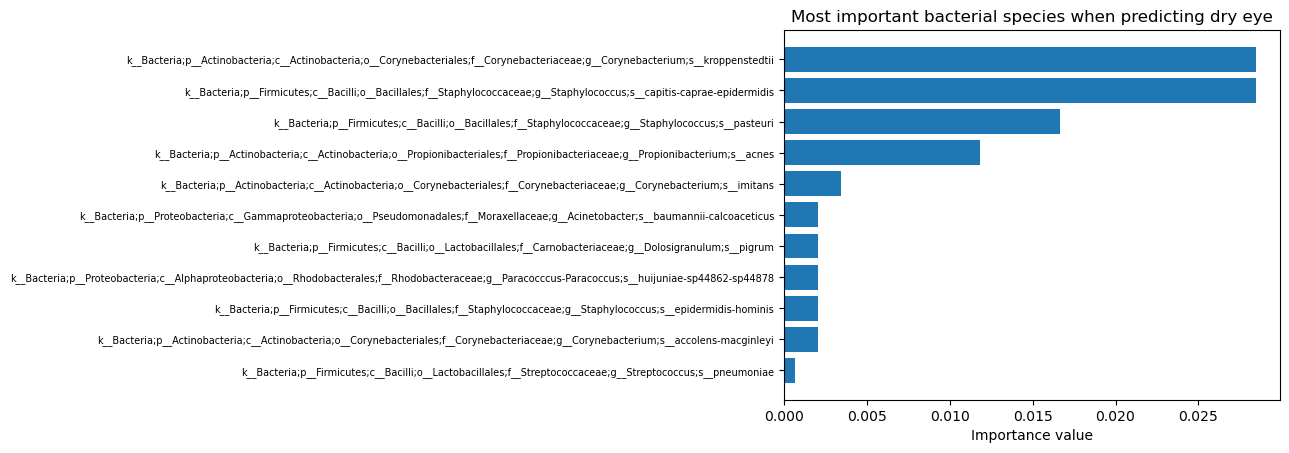

In [29]:
plt.title('Most important bacterial species when predicting dry eye')
plt.xlabel('Importance value')
plt.yticks(size=7)
plt.barh(MLPfeatures['Features'], MLPfeatures['Importance_values'], height=0.8)
plt.show()

In [32]:
# Create a SHAP explainer for the LightGBM model

explainermlp = shap.Explainer(clfmlp.predict, X, max_evals=2635)

In [33]:
# Compute SHAP values for the dataset

shap_valuesmlp = explainermlp(X)

Permutation explainer: 92it [01:43,  1.24s/it]                        


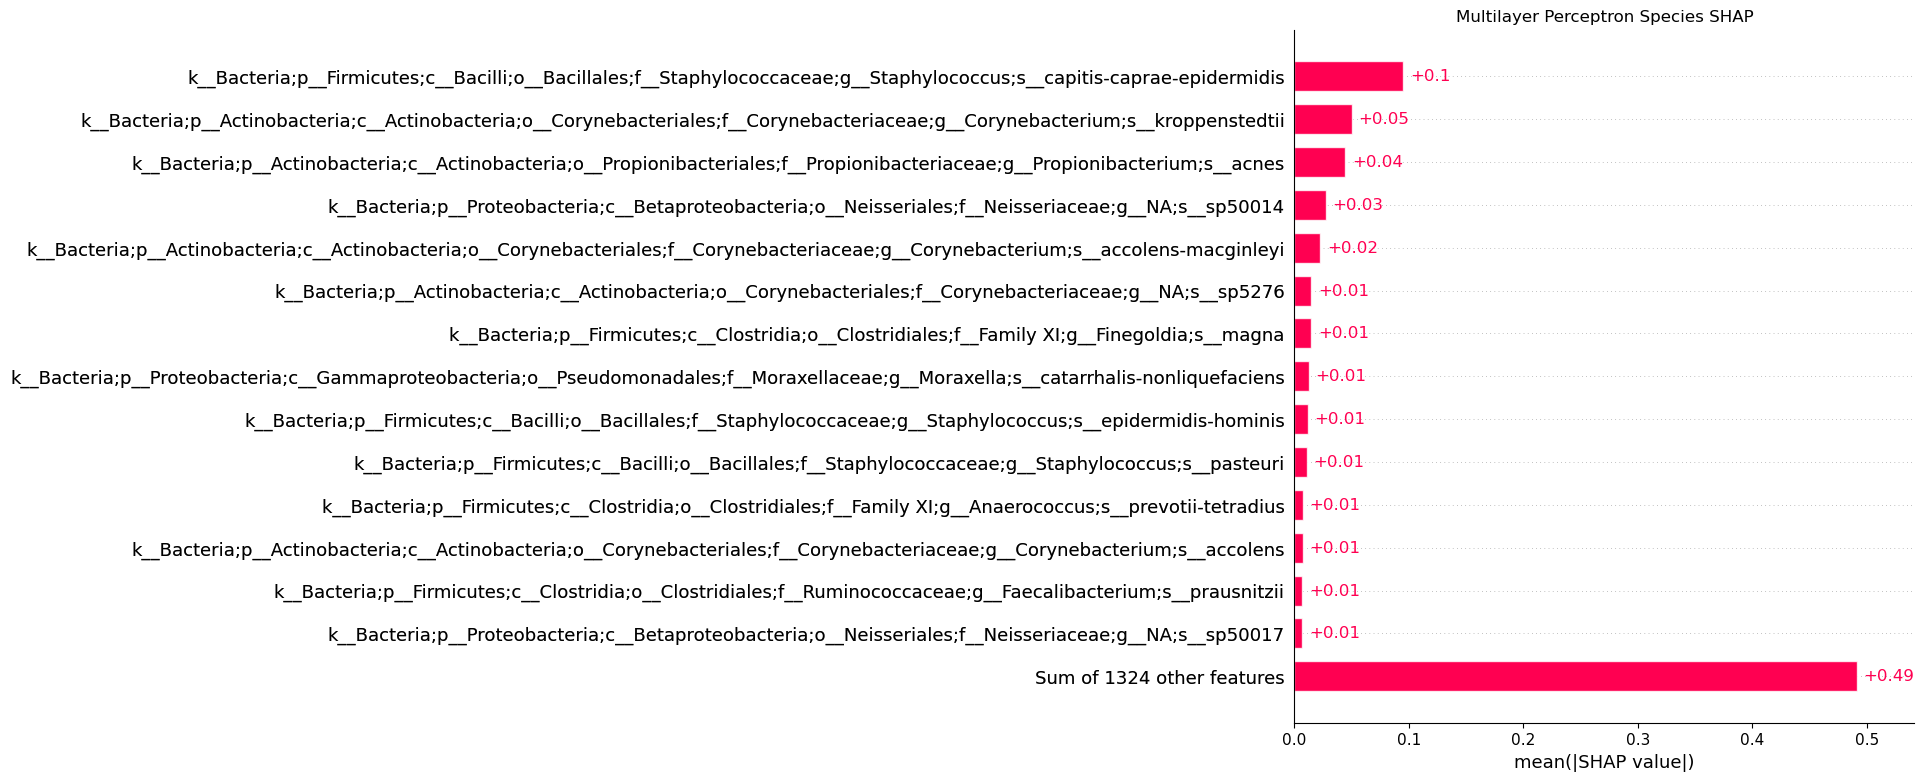

In [34]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesmlp, max_display=15, show=False)
plt.title('Multilayer Perceptron Species SHAP')
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


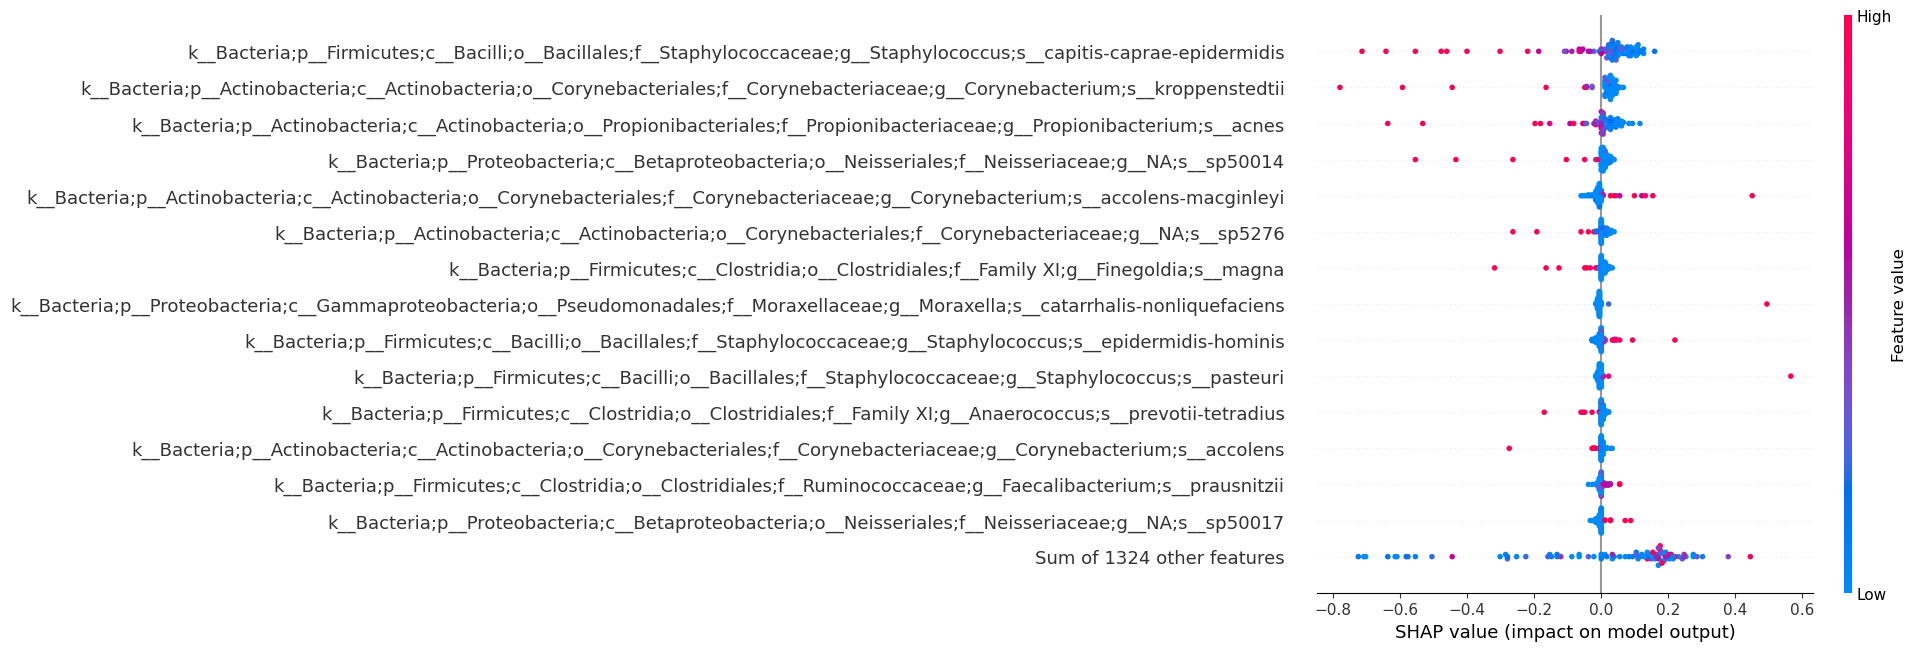

In [35]:
shap.plots.beeswarm(shap_valuesmlp, max_display=15)